<a href="https://colab.research.google.com/github/KajalRathod27/PRODIGY_ML_02/blob/main/K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df = pd.read_csv('/content/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [16]:
df['TotalSpend'] = df['Annual Income (k$)'] * df['Spending Score (1-100)']
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'TotalSpend']]

In [17]:
# Data Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [18]:
# Applying PCA for Dimensionality Reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [21]:
# Finding the Optimal Number of Clusters using Silhouette Score
best_score = -1
best_k = 0

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    y_kmeans = kmeans.fit_predict(X_pca)
    score = silhouette_score(X_pca, y_kmeans)
    print(f'For n_clusters={k}, Silhouette Score={score}')

    if score > best_score:
        best_score = score
        best_k = k

print(f'\nOptimal Number of Clusters: {best_k}')
print(f'Best Silhouette Score: {best_score}')

For n_clusters=2, Silhouette Score=0.48647342342988265
For n_clusters=3, Silhouette Score=0.48992228238335533
For n_clusters=4, Silhouette Score=0.3593764786487087
For n_clusters=5, Silhouette Score=0.43050963971304523
For n_clusters=6, Silhouette Score=0.41273267592452256
For n_clusters=7, Silhouette Score=0.4042632450524043
For n_clusters=8, Silhouette Score=0.4211074975902019
For n_clusters=9, Silhouette Score=0.3862514463863629
For n_clusters=10, Silhouette Score=0.3708778278761333

Optimal Number of Clusters: 3
Best Silhouette Score: 0.48992228238335533


In [22]:
# Train KMeans with the optimal number of clusters
kmeans_optimal = KMeans(n_clusters=best_k, init='k-means++', random_state=42)
y_kmeans_optimal = kmeans_optimal.fit_predict(X_pca)

In [23]:
# Add cluster labels to the original dataframe
df['Cluster'] = y_kmeans_optimal

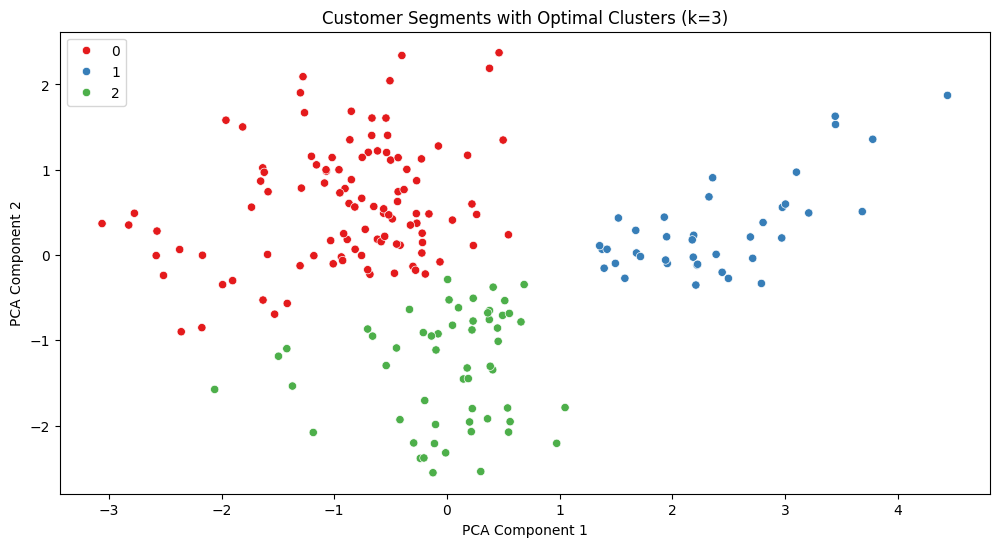

In [24]:
# Visualize the Clusters
plt.figure(figsize=(12, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_kmeans_optimal, palette='Set1')
plt.title(f'Customer Segments with Optimal Clusters (k={best_k})')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

In [25]:
# Define a new customer data point (replace these values as needed)
new_customer = pd.DataFrame({
    'Age': [30],  # Example age
    'Annual Income (k$)': [60],  # Example annual income
    'Spending Score (1-100)': [70]  # Example spending score
})
# Calculate TotalSpend for the new customer
new_customer['TotalSpend'] = new_customer['Annual Income (k$)'] * new_customer['Spending Score (1-100)']

# Apply the same scaling used for training data
new_customer_scaled = scaler.transform(new_customer)

# Apply the same PCA transformation
new_customer_pca = pca.transform(new_customer_scaled)

# Predict the cluster for the new customer
new_customer_cluster = kmeans_optimal.predict(new_customer_pca)

print(f'The new customer belongs to cluster: {new_customer_cluster[0]}')

The new customer belongs to cluster: 2
